In [16]:
# Import packages
import os
import re  # regular expressions
import warnings
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em

import rioxarray as rxr

from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint

from sklearn.datasets import dump_svmlight_file

from glob import glob

from queue import Queue

warnings.simplefilter('ignore')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'BD', 'BA_DATA'))

In [34]:
vege_fs84 = glob('VegeData_16day/*h08v04*')

In [35]:
vege_fs84

['VegeData_16day\\MOD13A2.A2000049.h08v04.006.2015136104431.hdf',
 'VegeData_16day\\MOD13A2.A2000065.h08v04.006.2015136023134.hdf',
 'VegeData_16day\\MOD13A2.A2000081.h08v04.006.2015136041919.hdf',
 'VegeData_16day\\MOD13A2.A2000097.h08v04.006.2015136041351.hdf',
 'VegeData_16day\\MOD13A2.A2000113.h08v04.006.2015137032541.hdf',
 'VegeData_16day\\MOD13A2.A2000129.h08v04.006.2015137052605.hdf',
 'VegeData_16day\\MOD13A2.A2000145.h08v04.006.2015137094710.hdf',
 'VegeData_16day\\MOD13A2.A2000161.h08v04.006.2015137045247.hdf',
 'VegeData_16day\\MOD13A2.A2000177.h08v04.006.2015138073355.hdf',
 'VegeData_16day\\MOD13A2.A2000193.h08v04.006.2015138073331.hdf',
 'VegeData_16day\\MOD13A2.A2000209.h08v04.006.2015138075107.hdf',
 'VegeData_16day\\MOD13A2.A2000225.h08v04.006.2015138071852.hdf',
 'VegeData_16day\\MOD13A2.A2000241.h08v04.006.2015138080542.hdf',
 'VegeData_16day\\MOD13A2.A2000257.h08v04.006.2015139074244.hdf',
 'VegeData_16day\\MOD13A2.A2000273.h08v04.006.2015139075114.hdf',
 'VegeData

In [36]:
vege_fs85 = glob('VegeData_16day/*h08v05*')

In [37]:
vege_fs85

['VegeData_16day\\MOD13A2.A2000049.h08v05.006.2015136104428.hdf',
 'VegeData_16day\\MOD13A2.A2000065.h08v05.006.2015136022932.hdf',
 'VegeData_16day\\MOD13A2.A2000081.h08v05.006.2015136041359.hdf',
 'VegeData_16day\\MOD13A2.A2000097.h08v05.006.2015136040245.hdf',
 'VegeData_16day\\MOD13A2.A2000113.h08v05.006.2015137035140.hdf',
 'VegeData_16day\\MOD13A2.A2000129.h08v05.006.2015137052212.hdf',
 'VegeData_16day\\MOD13A2.A2000145.h08v05.006.2015137095459.hdf',
 'VegeData_16day\\MOD13A2.A2000161.h08v05.006.2015137044400.hdf',
 'VegeData_16day\\MOD13A2.A2000177.h08v05.006.2015138071538.hdf',
 'VegeData_16day\\MOD13A2.A2000193.h08v05.006.2015138073343.hdf',
 'VegeData_16day\\MOD13A2.A2000209.h08v05.006.2015138075104.hdf',
 'VegeData_16day\\MOD13A2.A2000225.h08v05.006.2015138072405.hdf',
 'VegeData_16day\\MOD13A2.A2000241.h08v05.006.2015138080540.hdf',
 'VegeData_16day\\MOD13A2.A2000257.h08v05.006.2015139073842.hdf',
 'VegeData_16day\\MOD13A2.A2000273.h08v05.006.2015139075119.hdf',
 'VegeData

In [2]:
vege_path = os.path.join("VegeData_16day", "MOD13A2.A2000049.h08v05.006.2015136104428.hdf")

In [3]:
tem_path = os.path.join("TemData", "MOD11A2.A2000049.h08v05.006.2015058135046.hdf")

In [4]:
with rio.open(vege_path) as dataset:
    print(dataset)
    hdf4_meta = dataset.meta

# Notice that there are metadata at the highest level of the file
hdf4_meta

<open DatasetReader name='VegeData_16day\MOD13A2.A2000049.h08v05.006.2015136104428.hdf' mode='r'>


{'driver': 'HDF4',
 'dtype': 'float_',
 'nodata': None,
 'width': 512,
 'height': 512,
 'count': 0,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [5]:
# Print all of the subdatasets in the data
with rio.open(vege_path) as dataset:
    crs = dataset.read_crs()
    for name in dataset.subdatasets:
        print(name)

HDF4_EOS:EOS_GRID:VegeData_16day\MOD13A2.A2000049.h08v05.006.2015136104428.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI
HDF4_EOS:EOS_GRID:VegeData_16day\MOD13A2.A2000049.h08v05.006.2015136104428.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle
HDF4_EOS:EOS_GRID:VegeData_16day\MOD13A2.A2000049.h08v05.006.2015136104428.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days composite day of the year
HDF4_EOS:EOS_GRID:VegeData_16day\MOD13A2.A2000049.h08v05.006.2015136104428.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days pixel reliability
HDF4_EOS:EOS_GRID:VegeData_16day\MOD13A2.A2000049.h08v05.006.2015136104428.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI
HDF4_EOS:EOS_GRID:VegeData_16day\MOD13A2.A2000049.h08v05.006.2015136104428.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality
HDF4_EOS:EOS_GRID:VegeData_16day\MOD13A2.A2000049.h08v05.006.2015136104428.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days red reflectance
HDF4_EOS:EOS_GRID:VegeData_16day\MOD13A2.A2000049.h08v05.006.2015136104428.hdf:MODIS_

In [6]:
# Create empty list to append arrays (of band data)
all_bands = []

# Open the pre-fire HDF4 file
with rio.open(vege_path) as dataset:
    
    # Loop through each subdataset in HDF4 file
    for name in dataset.subdatasets:
        
        # Use regular expression to identify if subdataset has b0 in the name (the bands)
        if re.search("NDVI", name):
            
            # Open the band subdataset
            with rio.open(name) as subdataset:
                modis_meta = subdataset.profile
                
                # Read band data as a 2 dim arr and append to list
                all_bands.append(subdataset.read(1))

# Stack pre-fire reflectance bands
vege_modis = np.stack(all_bands)
vege_modis.shape

(1, 1200, 1200)

In [7]:
with rio.open(tem_path) as dataset:
    print(dataset)
    hdf4_meta = dataset.meta

# Notice that there are metadata at the highest level of the file
hdf4_meta

<open DatasetReader name='TemData\MOD11A2.A2000049.h08v05.006.2015058135046.hdf' mode='r'>


{'driver': 'HDF4',
 'dtype': 'float_',
 'nodata': None,
 'width': 512,
 'height': 512,
 'count': 0,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [8]:
# Print all of the subdatasets in the data
with rio.open(tem_path) as dataset:
    crs = dataset.read_crs()
    for name in dataset.subdatasets:
        print(name)

HDF4_EOS:EOS_GRID:TemData\MOD11A2.A2000049.h08v05.006.2015058135046.hdf:MODIS_Grid_8Day_1km_LST:LST_Day_1km
HDF4_EOS:EOS_GRID:TemData\MOD11A2.A2000049.h08v05.006.2015058135046.hdf:MODIS_Grid_8Day_1km_LST:Emis_32
HDF4_EOS:EOS_GRID:TemData\MOD11A2.A2000049.h08v05.006.2015058135046.hdf:MODIS_Grid_8Day_1km_LST:Clear_sky_days
HDF4_EOS:EOS_GRID:TemData\MOD11A2.A2000049.h08v05.006.2015058135046.hdf:MODIS_Grid_8Day_1km_LST:Clear_sky_nights
HDF4_EOS:EOS_GRID:TemData\MOD11A2.A2000049.h08v05.006.2015058135046.hdf:MODIS_Grid_8Day_1km_LST:QC_Day
HDF4_EOS:EOS_GRID:TemData\MOD11A2.A2000049.h08v05.006.2015058135046.hdf:MODIS_Grid_8Day_1km_LST:Day_view_time
HDF4_EOS:EOS_GRID:TemData\MOD11A2.A2000049.h08v05.006.2015058135046.hdf:MODIS_Grid_8Day_1km_LST:Day_view_angl
HDF4_EOS:EOS_GRID:TemData\MOD11A2.A2000049.h08v05.006.2015058135046.hdf:MODIS_Grid_8Day_1km_LST:LST_Night_1km
HDF4_EOS:EOS_GRID:TemData\MOD11A2.A2000049.h08v05.006.2015058135046.hdf:MODIS_Grid_8Day_1km_LST:QC_Night
HDF4_EOS:EOS_GRID:TemData\

In [9]:
# Create empty list to append arrays (of band data)
all_bands = []

# Open the pre-fire HDF4 file
with rio.open(tem_path) as dataset:
    
    # Loop through each subdataset in HDF4 file
    for name in dataset.subdatasets:
        
        # Use regular expression to identify if subdataset has b0 in the name (the bands)
        if re.search("LST_Day", name):
            
            # Open the band subdataset
            with rio.open(name) as subdataset:
                modis_meta = subdataset.profile
                
                # Read band data as a 2 dim arr and append to list
                all_bands.append(subdataset.read(1))

# Stack pre-fire reflectance bands
tem_modis = np.stack(all_bands)
tem_modis.shape

(1, 1200, 1200)

### Mask function

Pick any location, divide the neighborhood into 10 regions of interest in various directions, each region is within 50 km, 36 degree and 50 km sector as a region. 

In [10]:
def sector_mask(shape,centre,radius,angle_range):
    """
    Return a boolean mask for a circular sector. The start/stop angles in  
    `angle_range` should be given in clockwise order.
    """

    x,y = np.ogrid[:shape[0],:shape[1]]
    cx,cy = centre
    tmin,tmax = np.deg2rad(angle_range)

    # ensure stop angle > start angle
    if tmax < tmin:
            tmax += 2*np.pi

    # convert cartesian --> polar coordinates
    r2 = (x-cx)*(x-cx) + (y-cy)*(y-cy)
    theta = np.arctan2(x-cx,y-cy) - tmin

    # wrap angles between 0 and 2*pi
    theta %= (2*np.pi)

    # circular mask
    circmask = r2 <= radius*radius

    # angular mask
    anglemask = theta <= (tmax-tmin)

    return circmask*anglemask

In [11]:
vege_modis[0]

array([[-3000, -3000, -3000, ...,  1969,  2178,  1746],
       [-3000, -3000, -3000, ...,  1891,  1647,  1484],
       [-3000, -3000, -3000, ...,  1609,  1555,  1629],
       ...,
       [ 1786,  1623,  1794, ...,  1756,  1865,  2002],
       [ 1803,  1910,  1885, ...,  1894,  1949,  1936],
       [ 1825,  1834,  1812, ...,  1953,  2001,  1964]], dtype=int16)

In [12]:
vege_modis.shape

(1, 1200, 1200)

In [13]:
vege_matrix = vege_modis.reshape(1200,1200)

In [14]:
vege_matrix.shape

(1200, 1200)

In [15]:
vege_matrix

array([[-3000, -3000, -3000, ...,  1969,  2178,  1746],
       [-3000, -3000, -3000, ...,  1891,  1647,  1484],
       [-3000, -3000, -3000, ...,  1609,  1555,  1629],
       ...,
       [ 1786,  1623,  1794, ...,  1756,  1865,  2002],
       [ 1803,  1910,  1885, ...,  1894,  1949,  1936],
       [ 1825,  1834,  1812, ...,  1953,  2001,  1964]], dtype=int16)

In [77]:
mask = sector_mask(vege_matrix.shape, (400, 600), 50, (0,36)) # need to consider the boundary cases

In [78]:
from matplotlib import pyplot as pp

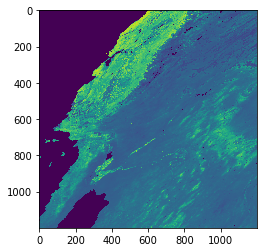

In [79]:
pp.imshow(vege_matrix)
pp.show()

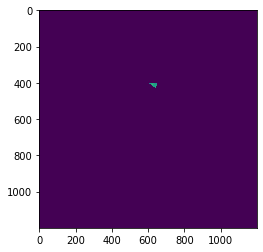

In [80]:
test_matrix = vege_matrix.copy()
test_matrix[~mask] = -3000
pp.imshow(test_matrix)
pp.show()

In [81]:
test_matrix.shape

(1200, 1200)

In [82]:
test_matrix[mask]

array([  297,  -376, -3000,  -301,  -258,  -276,  -290,  -269,  -420,
        -361,  -460,  -743,  -306,  -321,   340,   300,   554,   965,
        1055,  2091,  1226,  1194,  1289,  1240,  1085,   932,   974,
        1223,  1258,   925,   828,   813,  1867,  2268,  1209,   818,
         741,   707,   742,   754,   851,   883,   757,   854,  1463,
         396,   562,   224,  1324,   583,  1679,  -257,  -197,  -296,
        -381,  -552,  -502,  -486,  -321,  -321,  -234,  -289,  -192,
         340,   260,   554,  1871,  1495,  1201,  1220,  1131,  1130,
        1108,  1047,  1622,   920,   960,   852,   871,   829,   917,
        1414,   977,   741,   765,   740,   739,   876,   874,   700,
         966,   912,  1046,   317,    -7,   365,   813,   611,   184,
        -415,  -369,  -302, -3000,  -458,  -348,  -296,   -57,    80,
         -94,   231,   719,  1009,  1301,  1639,  1384,  1146,  1098,
        1039,   996,  1102,  1072,   998,   956,   923,   829,   769,
         743,  1477,

In [83]:
test_matrix[mask].shape

(809,)

In [84]:
a = test_matrix[mask]

In [85]:
a[:][a[:] == -3000] = -2000

In [87]:
np.mean(a)

815.5908529048207

In [86]:
a

array([  297,  -376, -2000,  -301,  -258,  -276,  -290,  -269,  -420,
        -361,  -460,  -743,  -306,  -321,   340,   300,   554,   965,
        1055,  2091,  1226,  1194,  1289,  1240,  1085,   932,   974,
        1223,  1258,   925,   828,   813,  1867,  2268,  1209,   818,
         741,   707,   742,   754,   851,   883,   757,   854,  1463,
         396,   562,   224,  1324,   583,  1679,  -257,  -197,  -296,
        -381,  -552,  -502,  -486,  -321,  -321,  -234,  -289,  -192,
         340,   260,   554,  1871,  1495,  1201,  1220,  1131,  1130,
        1108,  1047,  1622,   920,   960,   852,   871,   829,   917,
        1414,   977,   741,   765,   740,   739,   876,   874,   700,
         966,   912,  1046,   317,    -7,   365,   813,   611,   184,
        -415,  -369,  -302, -2000,  -458,  -348,  -296,   -57,    80,
         -94,   231,   719,  1009,  1301,  1639,  1384,  1146,  1098,
        1039,   996,  1102,  1072,   998,   956,   923,   829,   769,
         743,  1477,

In [45]:
b.shape

(801,)

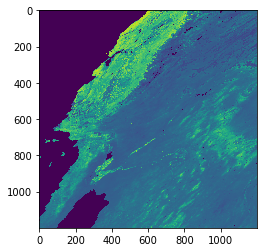

In [32]:
pp.imshow(vege_matrix)
pp.show()

### Process each hdf file

8-day for thermal_data, tem_data and NE_data

16-day for vegetation_data

In [74]:
def compute_feature_set(file, sds, fill_value, new_value, row, column, radius):
    """
    Return a feature set of a single pixel with row number r and column number c in the 1200 * 1200 map from FILE.
    Feature set is computed based on the average value in 10 regions in one time frame for the feature SDS from FILENAMES.
    Fill_value will be replaced by new_value in the feature matrix.
    
    """
    all_bands = []
    with rio.open(file) as dataset:
        for name in dataset.subdatasets:
            if re.search(sds, name):
                with rio.open(name) as subdataset:
                    modis_meta = subdataset.profile
                    all_bands.append(subdataset.read(1))
    vege_modis = np.stack(all_bands)
    vege_matrix = vege_modis[0].reshape(1200,1200)
    feature_set = []
    for i in range(10):
        mask = sector_mask(vege_matrix.shape, (row, column), radius, (i, i + 36))
        sector = vege_matrix[mask]
        sector[:][sector[:] == fill_value] = new_value
        mean_value = np.mean(sector)
        feature_set.append(mean_value)
    return feature_set

In [88]:
aa = compute_feature_set(vege_fs85[0], "NDVI", -3000, -2000, 400, 600, 50)

In [89]:
aa

[815.5908529048207,
 828.7701149425287,
 832.5051150895141,
 833.1696428571429,
 833.4770408163265,
 836.5420918367347,
 844.9021601016518,
 846.6989795918367,
 847.8191082802548,
 842.4495641344956]

In [94]:
bb = compute_feature_set(vege_fs85[0], "NDVI", -3000, -2000, 100, 600, 50)

In [95]:
bb

[4261.377008652657,
 4285.613026819923,
 4315.9667519181585,
 4358.744897959184,
 4369.308673469388,
 4379.682397959184,
 4396.337992376112,
 4369.440051020408,
 4356.342675159236,
 4362.504358655044]

### Reduce dimension

In [15]:
def rebin(m, shape):
    """
    Reshape the input matrix A to the shape SHAPE.
    """
    sh = shape[0],m.shape[0]//shape[0],shape[1],m.shape[1]//shape[1]
    return m.reshape(sh).mean(-1).mean(1)

### Combine two 8-day files

In [ ]:
def combine_hdf(filenames, num_file):
    """
    Combine every two 8-day files to compute a feature set. There are in total NUM_FILES in filenames. Used for 8-day datasets.
    Use a queue to help iterate through every two files.
    """
    q = Queue(maxsize = num_file)
    for filename in filenames:
        queue.put(filename)
    for i in range (num_file / 2):
        f1 = q.get()
        f2 = q.get()
    # not complete

Within a region, exact a small set of features, and ask is there any fire observed in the region in the past 16 days. Consider the intensity of fire, number of pixels with fire (a pixel with fire for 3 days are considered as 3 fire), for a region in the past 16 days.

In [3]:
ccc = np.arange(24).reshape((4,6))

In [4]:
ccc

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [5]:
ccc.shape

(4, 6)

In [8]:
ccc.reshape((2,ccc.shape[0]//2,2,-1)).mean(axis=3).mean(1)

array([[ 4.,  7.],
       [16., 19.]])

In [10]:
ccc

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [11]:
d = rebin(ccc, [2,3])

In [12]:
d

array([[ 3.5,  5.5,  7.5],
       [15.5, 17.5, 19.5]])

In [13]:
ccc

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])